In [3]:
#The basics
import pandas as pd
import numpy as np
import json

#Plotting
import matplotlib.pyplot as plt
import football_modelling 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf


from socceraction.data.wyscout import PublicWyscoutLoader

In [4]:
wyscout = PublicWyscoutLoader(root="/Users/thomas/Documents/data/football/wyscout_data", download=False)
# competitions
# events
# games 
# players 
# teams

In [5]:
wyscout

In [6]:
from football_modelling.data import load_wyscout_match_data

shots_model = load_wyscout_match_data()

In [7]:
shots_model.dtypes

Goal          int64
X             int64
Y             int64
C           float64
Distance    float64
Angle       float64
dtype: object

In [8]:
#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

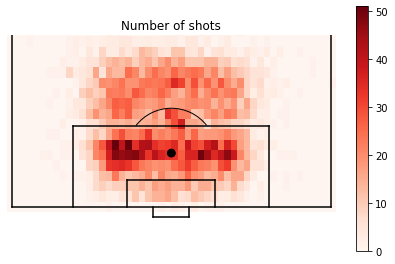

In [9]:
from football_modelling.plotting import createGoalMouth
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight")   

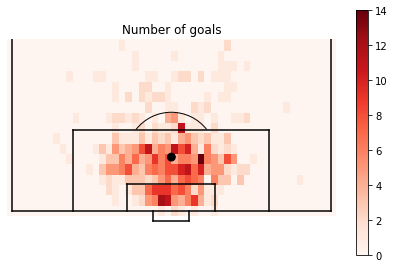

In [10]:
#Plot the number of GOALS from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('Output/NumberOfGoals.pdf', dpi=None, bbox_inches="tight")   


/var/folders/tj/210mgsf94f51kmvjq04yb70c0000gn/T/ipykernel_49554/376729439.py:3: RuntimeWarning: invalid value encountered in true_divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=1)


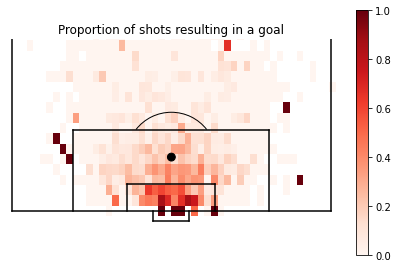

In [11]:
#Plot the probability of scoring from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=1)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig('Output/ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")   